In [ ]:
## Download dataset method definition
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
  

In [4]:
# Download dataset
fetch_housing_data();

In [5]:
# Load CSV dataset
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path) 

In [6]:
# Show dataset
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Group by value and count how many of each there are
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# Gives some information for the numeric fields
# The 25%, 50% and 75% represent de 1st quartile, the median, and the 3rd quartile
# The 1st quartile is the value of which 25% of observations are below
# ie: 25% of the rows are below 18 years (in housing_median_age)
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


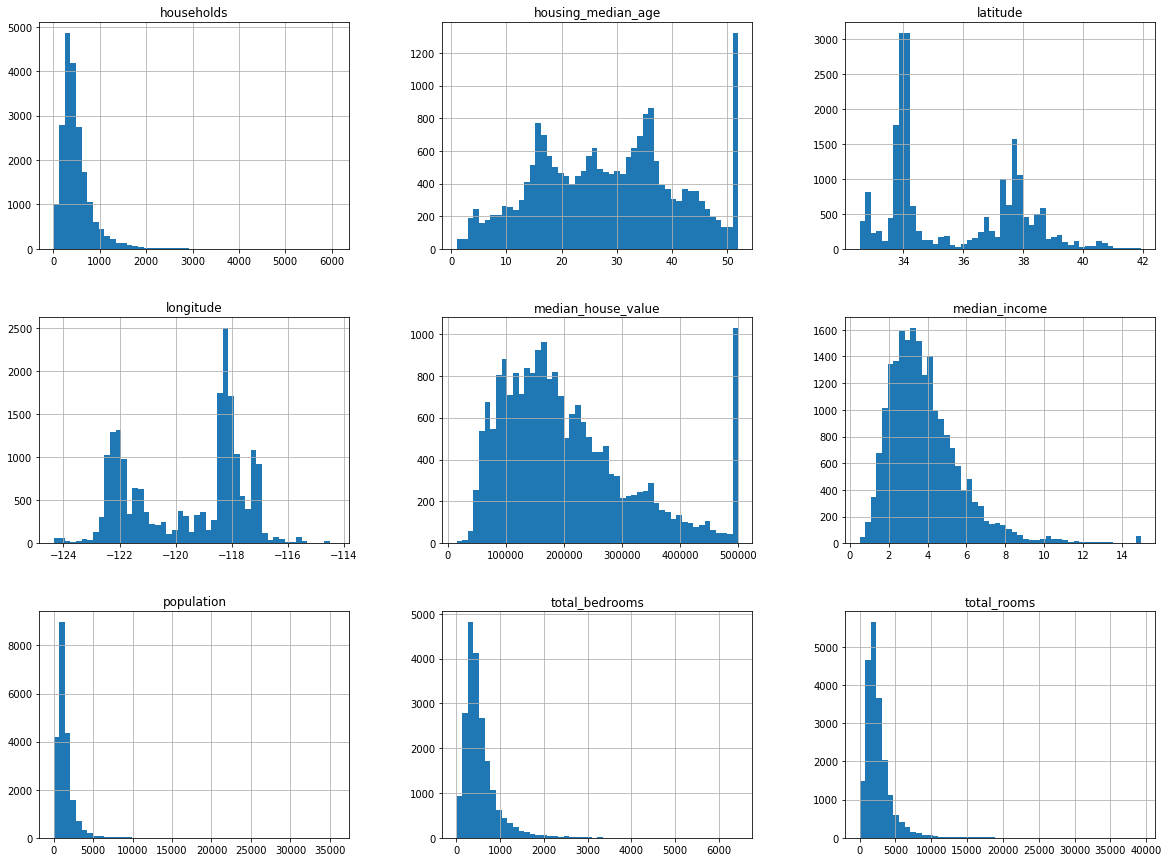

In [10]:
# This line sets matplotlib graphic engine to the jupyters notebook.
%matplotlib inline

# Plots a histogram of every field
import matplotlib.pyplot as plot
housing.hist(bins=50, figsize=[20,15])
plot.show()

In [11]:
# As the median income is an important feature to set the house value
# We want the test set to include representative amounts of persons for different income values
# So we create 5 groups of income and store them in housing["income_cat"]

import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [12]:
# Using scikit we create a test set representative of the strata.
# This means, we want to have a representative amount of each median_income group.
# ie: If in the entire set there are 10 in group 1 and 20 in group 2.
# It makes sense to take 1 from group one, but 2 from group 2, to keep the test set representative

from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
# This is the distribution of the income_cat field in the entire set
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [14]:
# This is the distribution of the income_cat field in the test set
# Note how the distributions are similar thanks to the stratified sampling
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [15]:
# Renormalize dataset, remove income_cat field
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [119]:
# Get the training set
housing = strat_train_set.copy()

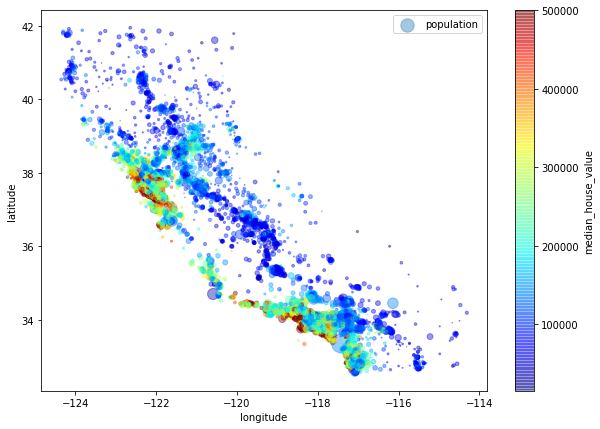

In [120]:
# Plot latitude and longitude
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plot.get_cmap("jet"), colorbar=True,
    sharex=False)
plot.legend()

In [ ]:
# Search for correlations with median_house_value
# The value means: If closer to 1, means that as the median_house_value grows, the other field grows
# If closer to -1, as the median_house_value grows, the other field go down
# NOTE: It only measures LINEAR correlations.
housing.corr()["median_house_value"].sort_values(ascending=False)

In [ ]:
# Scatter plot to compare fields
# We check those who have a strong correlation as seen in the previous cell
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms"]
scatter_matrix(housing[attributes],
              figsize=[12,8])
plot.show()

In [ ]:
# Plot the most correlated graph
# The correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed
housing.plot(kind="scatter",
            x="median_income",
            y="median_house_value",
            alpha=0.1)

In [ ]:
# We can create new fields, as a function of other fields, which could be 
# more correlated to the objective than the individual fields.
# In this case, bedrooms_per_room is much more correlated than total_rooms and total_bedrooms
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing.corr()["median_house_value"].sort_values(ascending=False)

In [ ]:
# Go back to the original training set.
# Separate it in predictors and labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# Fill null values with median
# Have to remove string value
# Medians: [ -118.51 , 34.26 , 29. , 2119. , 433. , 1164. , 408. , 3.5414]
# Imputer is an sklearn Transformer.

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1);
imputer.fit(housing_num); # Calculates medians
X = imputer.transform(housing_num); # Replaces null for medians
housing_tr = pd.DataFrame(X, columns=housing_num.columns);

In [ ]:
# Map ocean_proximity to numbers
# WARNING: This and the next to cells should be replaced with CategoricalEncoder
# Included from Sklearn v20.
from sklearn.preprocessing import LabelEncoder

ocean_proximity = housing["ocean_proximity"];
encoder = LabelEncoder()
ocean_proximity_num = encoder.fit_transform(ocean_proximity) # Map labels, and replace them

# encoder.classes_ to see the mapping

In [ ]:
# Now there's an issue.
# The algorithm will think that the classes 0 and 1 are "closer"
# But semantically, it has no sense for us.
# So we map the number to a vector. Where every value is 0 except the index equal to the mapped number.
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder();
ocean_proximity_cat = encoder.fit_transform(ocean_proximity_num.reshape(-1, 1))

# This returns a sparse matrix. Which stores the non-zero indexes instead of the full matrix
# It's more performant


In [ ]:
# An alternative to the previous two steps, is to use the next:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer();
ocean_proximity_cat = encoder.fit_transform(housing["ocean_proximity"])
ocean_proximity_cat

# It returns a NumPy matrix, not a sparse one.
# Have to pass sparse_output=True to get the sparse matrix.

In [ ]:
# Custom transformers allow you to transform the data in a way that allows you to pipeline
# different transformations with other scikit transforms.

# Feature scaling is essential because most algorithms don't work with dispair scales.
# There are two scalings: Normalization (Squeeze between 0 and 1)
# and Standarization (Put the mean to 0, and divide by variance, to have variance of 1)
# Normalization works better for neural networks
# Standarization works better if there are any outliers
from sklearn.preprocessing import StandardScaler

In [ ]:
# This CategoricalEncoder class comes with Sklearn v20
# It does the one-hot encoding for the ocean_proximity.
from sklearn.utils import check_array 
from scipy import sparse
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be an array-like of integers or
    strings, denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot (aka one-of-K or dummy)
    encoding scheme (``encoding='onehot'``, the default) or converted
    to ordinal integers (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories must be sorted and should not mix
          strings and numeric values.
        The used categories can be found in the ``categories_`` attribute.
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros. In the inverse transform, an unknown category
        will be denoted as None.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting
        (in order corresponding with output of ``transform``).
    Examples
    --------
    Given a dataset with two features, we let the encoder find the unique
    values per feature and transform the data to a binary one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> X = [['Male', 1], ['Female', 3], ['Female', 2]]
    >>> enc.fit(X)
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.categories_
    [array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
    >>> enc.transform([['Female', 1], ['Male', 4]]).toarray()
    array([[ 1.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.]])
    >>> enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])
    array([['Male', 1],
           [None, 2]], dtype=object)
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        if self.categories != 'auto':
            for cats in self.categories:
                if not np.all(np.sort(cats) == np.array(cats)):
                    raise ValueError("Unsorted categories are not yet "
                                     "supported")

        X_temp = check_array(X, dtype=None)
        if not hasattr(X, 'dtype') and np.issubdtype(X_temp.dtype, str):
            X = check_array(X, dtype=np.object)
        else:
            X = X_temp

        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                if self.handle_unknown == 'error':
                    valid_mask = np.in1d(Xi, self.categories[i])
                    if not np.all(valid_mask):
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(self.categories[i])

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using specified encoding scheme.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X_temp = check_array(X, dtype=None)
        if not hasattr(X, 'dtype') and np.issubdtype(X_temp.dtype, str):
            X = check_array(X, dtype=np.object)
        else:
            X = X_temp

        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            Xi = X[:, i]
            valid_mask = np.in1d(Xi, self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    Xi = Xi.copy()
                    Xi[~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(Xi)

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        feature_indices = np.cumsum(n_values)

        indices = (X_int + feature_indices[:-1]).ravel()[mask]
        indptr = X_mask.sum(axis=1).cumsum()
        indptr = np.insert(indptr, 0, 0)
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csr_matrix((data, indices, indptr),
                                shape=(n_samples, feature_indices[-1]),
                                dtype=self.dtype)
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

    def inverse_transform(self, X):
        """Convert back the data to the original representation.
        In case unknown categories are encountered (all zero's in the
        one-hot encoding), ``None`` is used to represent this category.
        Parameters
        ----------
        X : array-like or sparse matrix, shape [n_samples, n_encoded_features]
            The transformed data.
        Returns
        -------
        X_tr : array-like, shape [n_samples, n_features]
            Inverse transformed array.
        """
        check_is_fitted(self, 'categories_')
        X = check_array(X, accept_sparse='csr')

        n_samples, _ = X.shape
        n_features = len(self.categories_)
        n_transformed_features = sum([len(cats) for cats in self.categories_])

        # validate shape of passed X
        msg = ("Shape of the passed X data is not correct. Expected {0} "
               "columns, got {1}.")
        if self.encoding == 'ordinal' and X.shape[1] != n_features:
            raise ValueError(msg.format(n_features, X.shape[1]))
        elif (self.encoding.startswith('onehot')
                and X.shape[1] != n_transformed_features):
            raise ValueError(msg.format(n_transformed_features, X.shape[1]))

        # create resulting array of appropriate dtype
        dt = np.find_common_type([cat.dtype for cat in self.categories_], [])
        X_tr = np.empty((n_samples, n_features), dtype=dt)

        if self.encoding == 'ordinal':
            for i in range(n_features):
                labels = X[:, i].astype('int64')
                X_tr[:, i] = self.categories_[i][labels]

        else:  # encoding == 'onehot' / 'onehot-dense'
            j = 0
            found_unknown = {}

            for i in range(n_features):
                n_categories = len(self.categories_[i])
                sub = X[:, j:j + n_categories]

                # for sparse X argmax returns 2D matrix, ensure 1D array
                labels = np.asarray(_argmax(sub, axis=1)).flatten()
                X_tr[:, i] = self.categories_[i][labels]

                if self.handle_unknown == 'ignore':
                    # ignored unknown categories: we have a row of all zero's
                    unknown = np.asarray(sub.sum(axis=1) == 0).flatten()
                    if unknown.any():
                        found_unknown[i] = unknown

                j += n_categories

            # if ignored are found: potentially need to upcast result to
            # insert None values
            if found_unknown:
                if X_tr.dtype != object:
                    X_tr = X_tr.astype(object)

                for idx, mask in found_unknown.items():
                    X_tr[mask, idx] = None

        return X_tr

In [ ]:
# This is how pipelines work.
# A fit() on the pipeline calls fit_transform() for each son, except for the last one (only fit)
# A transform() transforms the data applying the fit results.
# A feature union executes in parallel both pipelines and then merges

from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class MyLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.le = LabelEncoder()

    def fit(self, x, y=None):
        return self.le.fit(x)

    def transform(self, x, y=None):
        return self.le.transform(x).reshape(-1,1)

    def fit_transform(self, x, y=None):
        self.fit(x)
        return self.transform(x)

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', CategoricalEncoder(encoding="onehot-dense")), # onehot-dense returns an array instead of a sparse matrix
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

In [ ]:
# If you get a warning, just ignore it.
# It means it looked for an external library, and fallback into another method.
# It works anyway. Here we train a LinearRegression Predictor.

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
# Try the predictor with some data from the training set.
# It is off for more than 50% in some cases!
# Remember that labels are the real values for the median_housing_value
# (The data you are trying to calculate)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels\t", list(some_labels))

In [ ]:
# Here we make a prediction using the full dataset
# We calculate the mean_squared_error
# We take its root to calculate the RMSE
# RMSE mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima.
# So, the error should tend to 0.
# This model is clearly underfitting.
# We could: 1) Reduce its constraints (Can't do since it has none)
#           2) Train with more features
#           3) Try another model

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
# Let's go with 3 and try with a different model
# ERROR of 0? Most likely an awful overfitting
# We don't want to try with the test set, since it is reserved
# To use when we have a useful model for sure.

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared);

# Lets calculate the error
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
# We should use cross-validation
# This image explains cross-validation pretty well:
# https://upload.wikimedia.org/wikipedia/commons/1/18/Esquema_castell%C3%A0.jpg
# Basicly, break your training set in pieces, and train different models using one of those pieces as the test set for each model
# ie: Divide the training set in 10. You will be creating 10 models, trained with 9/10 parts of the data.
#     The other 1/10 (which is differen for each model), will be used as a test set for that model

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
# To get the error we have to get -scores, because sklearn cross validation, expects a utility function (more is better)
# Not a cost functions (less is better), so the scoring function is actually the opposite of what we are passing
rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

In [ ]:
# Let's cross validate the linear regression model
# We can see now that the Decision Tree is overfiting so badly
# That it is outperformed by the linear regression!
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

In [ ]:
# Let's try now a Random Forest
# Random Forest work by training many decision trees on random subsets of the training data,
# And then averageing out the predictions. This is called Ensemble Learning.

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg = forest_reg.fit(housing_prepared, housing_labels)
housing_predict = forest_reg.predict(housing_prepared)

# Lets calculate the error
forest_mse = mean_squared_error(housing_labels, housing_predict)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

# Ok, Ok.. Seems promising.

In [ ]:
# Lets cross-validate
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

# Much better!
# However, note that the score for the training set (22570)
# Still much lower than the validation sets (Mean: 52628)
# This means that the model is still overfitting the training set.

In [ ]:
# Lets try now with SVM
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg = svr_reg.fit(housing_prepared, housing_labels)
housing_predict = svr_reg.predict(housing_prepared)

# Lets calculate the error
svr_mse = mean_squared_error(housing_labels, housing_predict)
svr_rmse = np.sqrt(svr_mse)
print("Training set error: ", svr_rmse)

# Error is 118577... Looks pretty bad.

# Let's cross validate

svr_scores = cross_val_score(svr_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

# Yeppp, pretty bad. AND REAAAALLY SLOW.

In [ ]:
# Lets try now with KNN
from sklearn.neighbors import KNeighborsRegressor
kn_reg = KNeighborsRegressor()
kn_reg = kn_reg.fit(housing_prepared, housing_labels)
housing_predict = kn_reg.predict(housing_prepared)

# Lets calculate the error
kn_mse = mean_squared_error(housing_labels, housing_predict)
kn_rmse = np.sqrt(kn_mse)
print("Training set error: ", kn_rmse)

# Error is 49837... Not that bad..

# Let's cross validate

kn_scores = cross_val_score(kn_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
kn_rmse_scores = np.sqrt(-kn_scores)
display_scores(kn_rmse_scores)

# OK, this one doesn't seem that bad. It overfits a little. Seems as bad as a Linear Regression.

In [ ]:
# Lets try now with Multilayer Perceptrons
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()
mlp_reg = mlp_reg.fit(housing_prepared, housing_labels)
housing_predict = mlp_reg.predict(housing_prepared)

# Lets calculate the error (164284, damn it sucks)
mlp_mse = mean_squared_error(housing_labels, housing_predict)
mlp_rmse = np.sqrt(mlp_mse)
print("Training set error: ", mlp_rmse)

# Let's cross validate

mlp_scores = cross_val_score(mlp_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
mlp_rmse_scores = np.sqrt(-mlp_scores)
display_scores(mlp_rmse_scores)

# Yepp, it sucks a lot.

In [ ]:
# Lets try now with a SVM with a sigmoid kernel.
from sklearn.svm import SVR
svr_reg = SVR(kernel="sigmoid")
svr_reg = svr_reg.fit(housing_prepared, housing_labels)
housing_predict = svr_reg.predict(housing_prepared)

# Lets calculate the error
svr_mse = mean_squared_error(housing_labels, housing_predict)
svr_rmse = np.sqrt(svr_mse)
print("Training set error: ", svr_rmse)

# Error is 118427... as bad as before.

# Let's cross validate

svr_scores = cross_val_score(svr_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

# Yeppp, pretty bad. AND REAAAALLY SLOW. (Mean: 118450.04140562555)

In [ ]:
# Well, apparently the best models so far are the random forest and the KN.
# We are automating the fine-tuning of the models.
# GridSearchCV let us set hyperparameters values, so it tries them out.
# If in doubt, write in powers of 10, or smaller numbers if you want a more fine-grained search.

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

# refit retrains the best model with the full traing set (Not only cross-validations sets)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           refit=True)

grid_search.fit(housing_prepared, housing_labels)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
# We could use GridSearch in our data preparation pipeline, on the hyperparameters such as
# add_bedrooms_per_room. It can find the best way to handle outliers.
# The best hyperparameters are: Mean score: 50028.88149688572 {'max_features': 8, 'n_estimators': 30}

# We could use RandomizedSearchCV instead of GridSearchCV, to try random hyperparameters, if the hyperparameter space is too big.
# We can try Ensembling different models. if the errors they make are different, the gain is big!

In [121]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35031615575883085, 'median_income'),
 (0.16248668766511118, 'INLAND'),
 (0.11560900593596572, 'pop_per_hhold'),
 (0.07201525238507908, 'longitude'),
 (0.0665161618783515, 'latitude'),
 (0.06388369171040789, 'rooms_per_hhold'),
 (0.056972900923027675, 'bedrooms_per_room'),
 (0.04203952877600895, 'housing_median_age'),
 (0.015356469835676151, 'total_rooms'),
 (0.01534778368722407, 'population'),
 (0.014532090180913775, 'total_bedrooms'),
 (0.013579002776779302, 'households'),
 (0.005639966122343594, '<1H OCEAN'),
 (0.0032929007055034457, 'NEAR OCEAN'),
 (0.0023415645842118564, 'NEAR BAY'),
 (7.083707456491345e-05, 'ISLAND')]